### Own class and methods

In [13]:
import knn

### Other imports

In [14]:
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import math

## Data prep

In [15]:
digits = load_digits()

Sample Example 😎
4


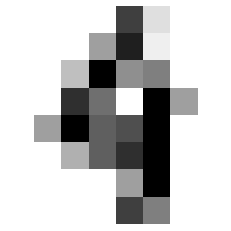

In [16]:
fig, ax = plt.subplots()
ax.set_axis_off()
ax.imshow(digits.images[24], cmap=plt.cm.gray_r)
print("Sample Example 😎")
print(digits.target[24])
plt.savefig('media\\five5.png')

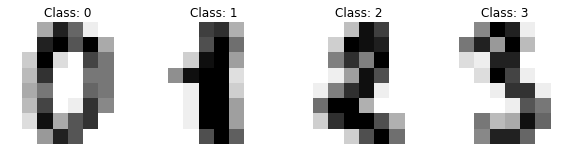

In [17]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Class: %i" % label)
plt.savefig('media\\digits.png')

Sample Example 😎


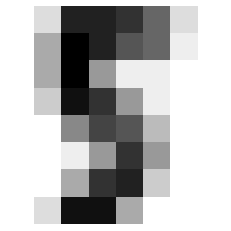

In [18]:
fig, ax = plt.subplots()
ax.set_axis_off()
ax.imshow(knn.create_representatives(digits.images,digits.target)[0][40], cmap=plt.cm.gray_r)
print("Sample Example 😎")
plt.savefig('media\\fice_representant.png')

#### Data division for cross-validation

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(
    digits.images, digits.target, test_size=0.25, shuffle=False
)

## Model

In [55]:
knn_model = knn.KNN(n_neighbours=2,representatives=False, collapse=True)

In [56]:
knn_model.fit(X_train,Y_train)

(1347, 8, 8)


In [53]:
knn_model.score(X_test,Y_test)

(0.8155555555555556,
 array([[32,  6,  0,  3,  0,  0,  0,  0,  4,  0],
        [ 4, 35,  0,  0,  3,  1,  0,  0, 10,  1],
        [ 2,  0, 43,  0,  0,  1,  0,  0,  0,  2],
        [ 2,  0,  0, 37,  0,  2,  0,  0,  0,  1],
        [ 0,  1,  0,  0, 45,  0,  1,  1,  0,  0],
        [ 0,  0,  0,  5,  0, 27,  0,  1,  0,  2],
        [ 0,  0,  0,  1,  0,  1, 46,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  8,  0, 41,  1,  3],
        [ 3,  4,  0,  1,  0,  4,  0,  0, 26,  1],
        [ 0,  0,  0,  0,  0,  1,  0,  2,  0, 35]]))

In [54]:
knn_model.score_for_n_in_range(X_test,Y_test,15)

(array([0.8244445 , 0.8244445 , 0.8155556 , 0.80444443, 0.80222225,
        0.80222225, 0.80222225, 0.80222225, 0.79333335, 0.78444445,
        0.7777778 , 0.7822222 , 0.77555555, 0.7777778 , 0.7777778 ],
       dtype=float32),
 array([[[31,  5,  1, ...,  0,  4,  1],
         [ 4, 37,  0, ...,  0,  8,  2],
         [ 3,  0, 42, ...,  0,  0,  0],
         ...,
         [ 0,  0,  0, ..., 44,  1,  0],
         [ 3,  3,  0, ...,  0, 28,  2],
         [ 0,  0,  0, ...,  1,  0, 37]],
 
        [[31,  5,  1, ...,  0,  4,  1],
         [ 4, 37,  0, ...,  0,  8,  2],
         [ 3,  0, 42, ...,  0,  0,  0],
         ...,
         [ 0,  0,  0, ..., 44,  1,  0],
         [ 3,  3,  0, ...,  0, 28,  2],
         [ 0,  0,  0, ...,  1,  0, 37]],
 
        [[32,  6,  0, ...,  0,  4,  0],
         [ 4, 35,  0, ...,  0, 10,  1],
         [ 2,  0, 43, ...,  0,  0,  2],
         ...,
         [ 0,  0,  0, ..., 41,  1,  3],
         [ 3,  4,  0, ...,  0, 26,  1],
         [ 0,  0,  0, ...,  2,  0, 35]],
 
 

In [20]:
a = np.array([[1, 2], [3,2]])
b = np.array([[4, 5], [2,6]])
np.concatenate([a,b])

array([[1, 2],
       [3, 2],
       [4, 5],
       [2, 6]])

In [21]:
digits.images.shape

(1797, 8, 8)

In [57]:
knn_model.cross_val_score(digits.images,digits.target)

WARNING! Cannot divide given dataset equally into 4 parts. Ignoring last 1 elements!
(1347, 8, 8)
(1347, 8, 8)
(1347, 8, 8)
(1347, 8, 8)


array([0.73496659, 0.75946548, 0.81737194, 0.82628062])